In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm


StatementMeta(, 2be89e7a-551b-43ea-b706-d967ed1ca14b, 47, Finished, Available)

/tmp/ipykernel_8119/3946093582.py:8: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [46]:
# Load train and Test set
train = pd.read_csv("abfss://HousingPrices@onelake.dfs.fabric.microsoft.com/Bronze.Lakehouse/Files/raw/train.csv")
test = pd.read_csv("abfss://HousingPrices@onelake.dfs.fabric.microsoft.com/Bronze.Lakehouse/Files/raw/test.csv")

StatementMeta(, 2be89e7a-551b-43ea-b706-d967ed1ca14b, 48, Finished, Available)

In [47]:
# Check the dataset
train.info()

StatementMeta(, 2be89e7a-551b-43ea-b706-d967ed1ca14b, 49, Finished, Available)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [48]:
# Check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

# Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

# Now drop the 'Id' column since it's unnecessary for the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

# Check data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

# Check the dataset
train.head(5)

StatementMeta(, 2be89e7a-551b-43ea-b706-d967ed1ca14b, 50, Finished, Available)

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [49]:
# Getting Description
train['SalePrice'].describe()
# An average house price of $180921 ~ 65 million huf (around 2008) in Iowa

StatementMeta(, 2be89e7a-551b-43ea-b706-d967ed1ca14b, 51, Finished, Available)

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

StatementMeta(, 2be89e7a-551b-43ea-b706-d967ed1ca14b, 52, Finished, Available)


 mu = 180921.20 and sigma = 79415.29



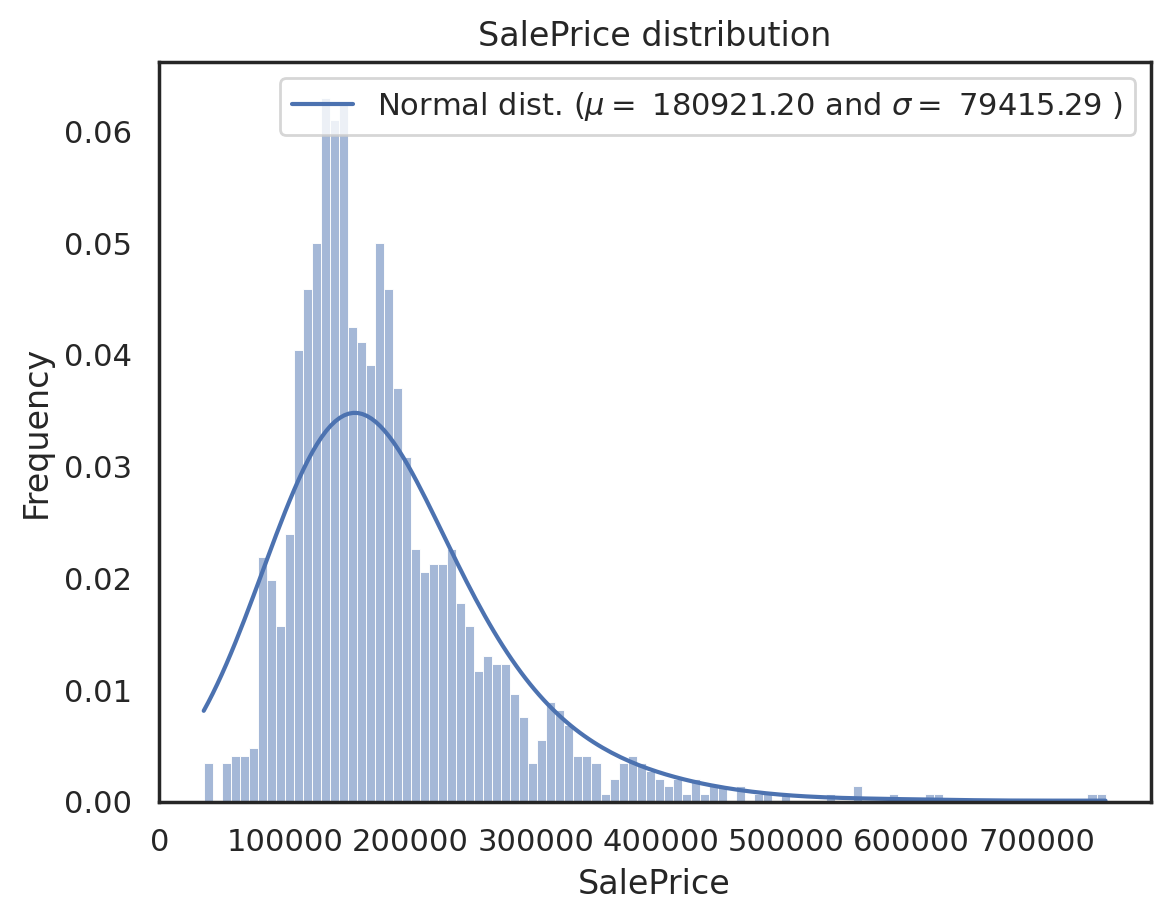

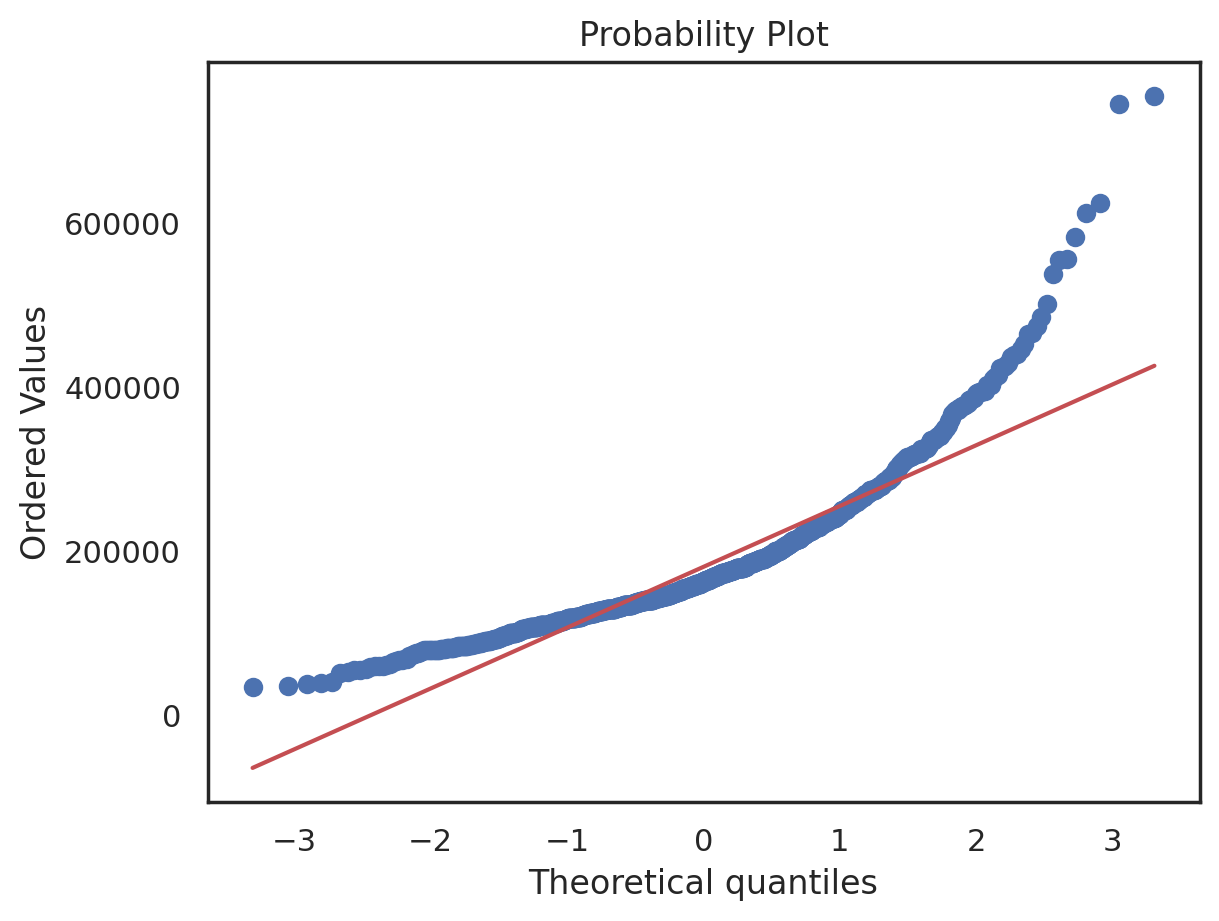

Skewness: 1.882876
Kurtosis: 6.536282


In [50]:
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

# Plot Histogram
#sns.distplot(train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});
#sns.histplot(train['SalePrice'] , kde=True, stat="density", linewidth=0);
sns.histplot(train['SalePrice'], stat="probability", bins=100, kde=True, kde_kws={"bw_adjust":3})

# Get normalized fitted parameters
(mu, sigma) = norm.fit(train['SalePrice'])

print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

# Data has to be as normal as possible

# Check categorical and numerical values

In [51]:
# Checking Categorical Data
train.select_dtypes(include=['object']).columns

StatementMeta(, 2be89e7a-551b-43ea-b706-d967ed1ca14b, 53, Finished, Available)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [52]:
# Checking Numerical Data
train.select_dtypes(include=['int64','float64']).columns

StatementMeta(, 2be89e7a-551b-43ea-b706-d967ed1ca14b, 54, Finished, Available)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [53]:
cat = len(train.select_dtypes(include=['object']).columns)
num = len(train.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', cat, 'categorical', '+',
      num, 'numerical', '=', cat+num, 'features')

StatementMeta(, 2be89e7a-551b-43ea-b706-d967ed1ca14b, 55, Finished, Available)

Total Features:  43 categorical + 37 numerical = 80 features


**Which is the most relevant feature?**

With 81 features, how could we possibly tell which feature is most related to house prices? Good thing we have a correlation matrix. Let's do it!

StatementMeta(, 2be89e7a-551b-43ea-b706-d967ed1ca14b, 56, Finished, Available)

/tmp/ipykernel_8119/1966192773.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train.corr() #only 37 column for numerical data


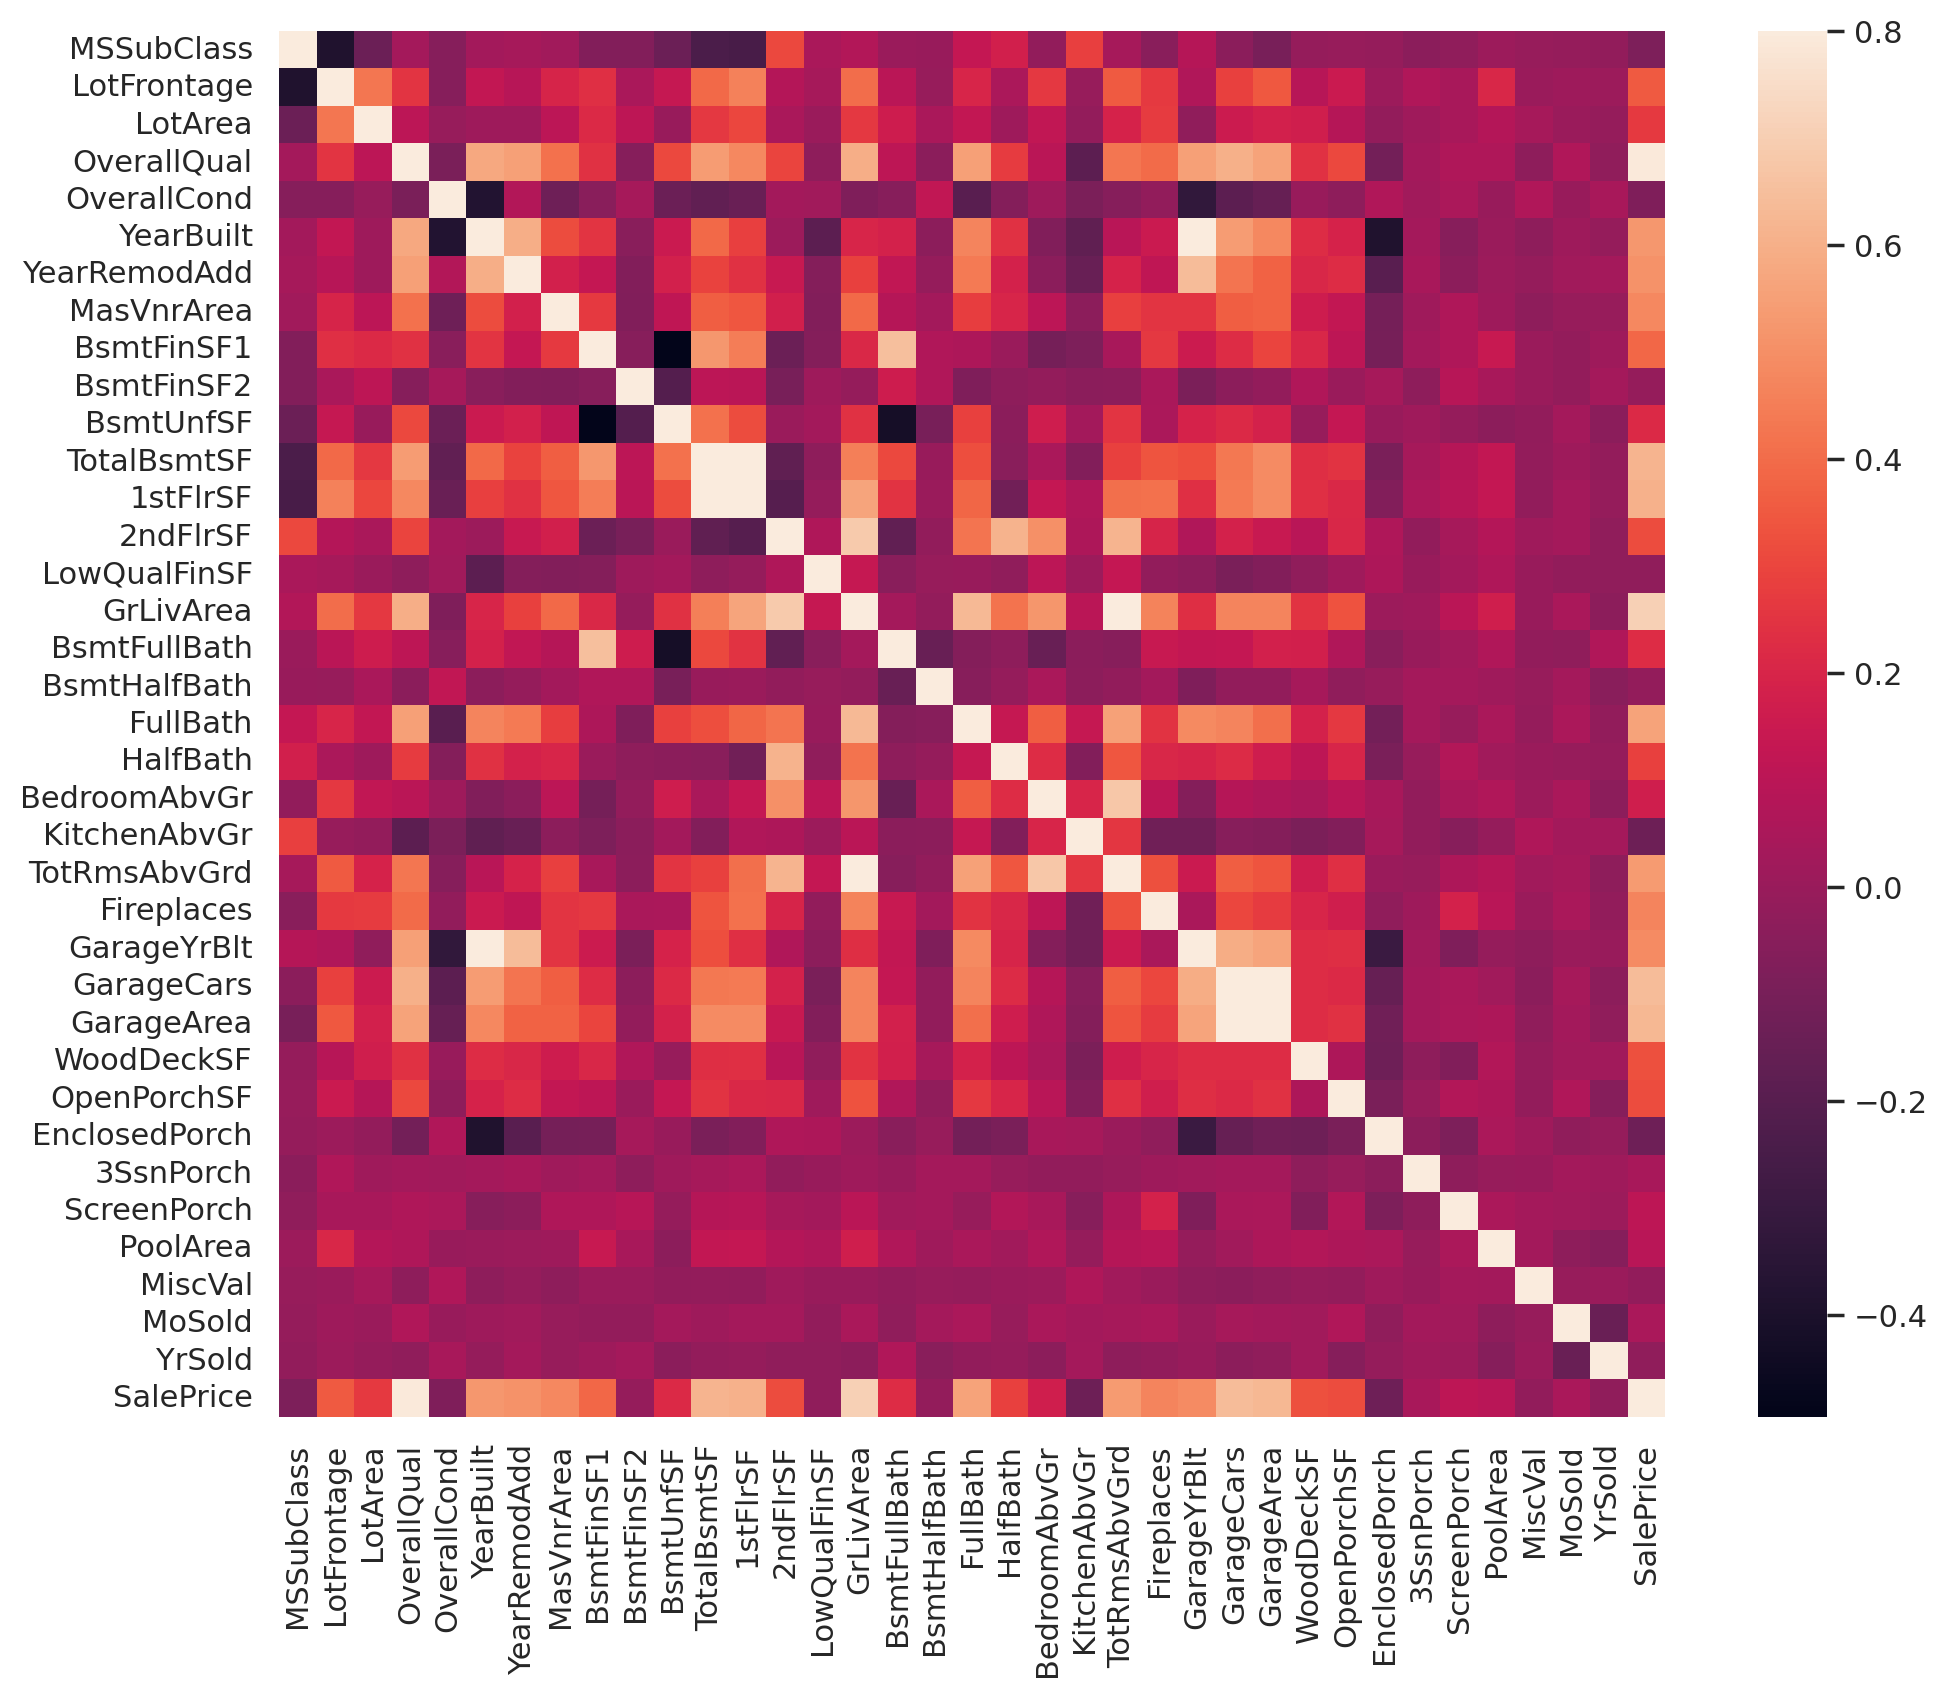

In [54]:
# Correlation Matrix Heatmap
corrmat = train.corr() #only 37 column for numerical data
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

StatementMeta(, 2be89e7a-551b-43ea-b706-d967ed1ca14b, 57, Finished, Available)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


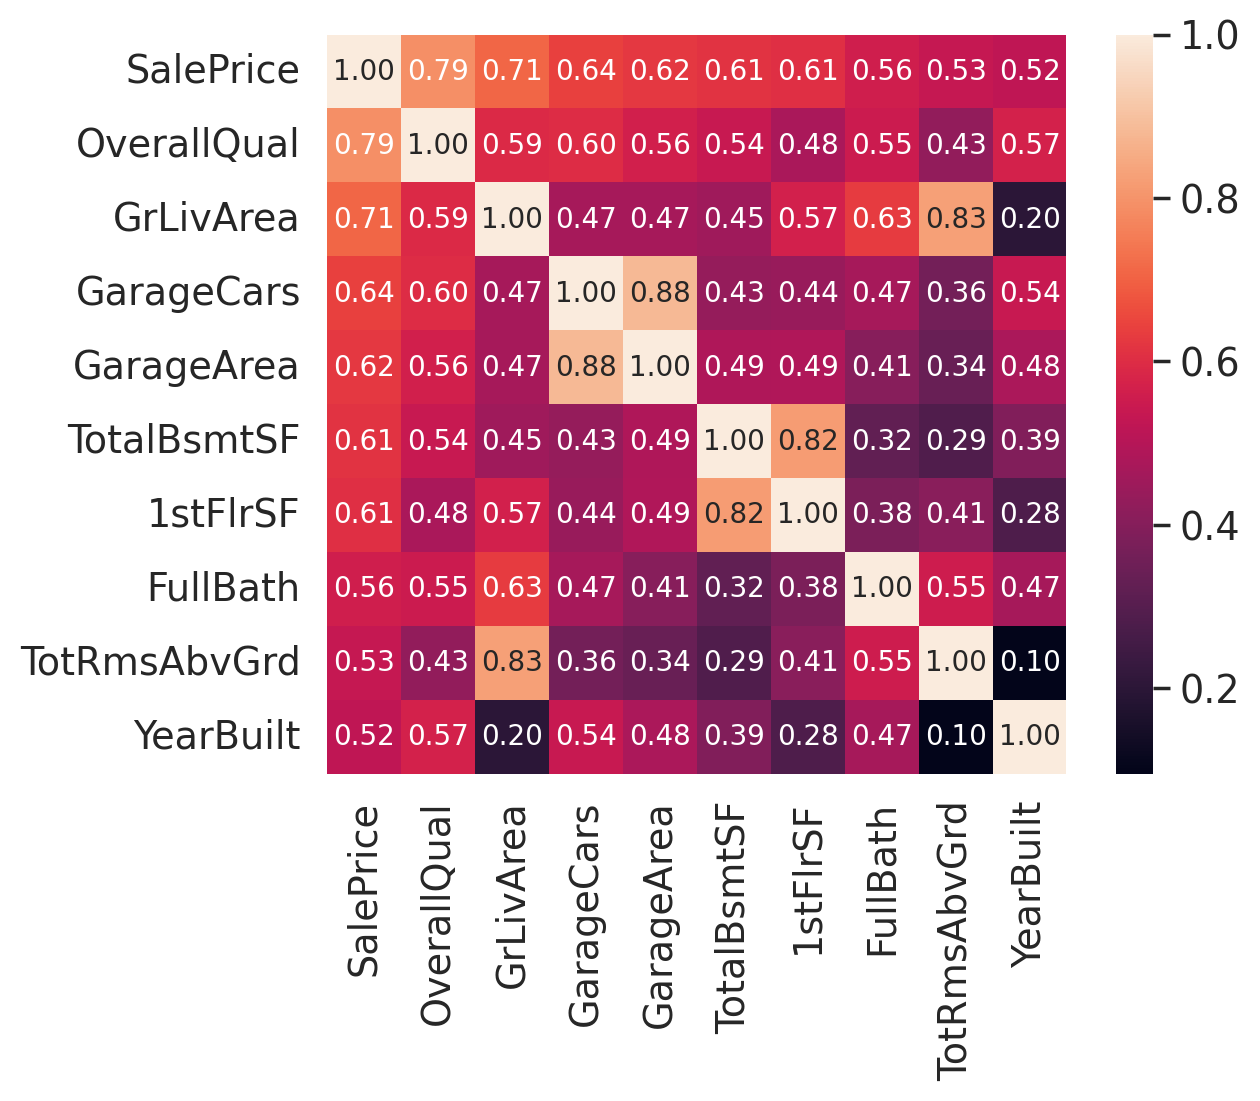

In [55]:
# Top 10 Heatmap
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


In [56]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

StatementMeta(, 2be89e7a-551b-43ea-b706-d967ed1ca14b, 58, Finished, Available)

,Most Correlated Features
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,GarageArea
5,TotalBsmtSF
6,1stFlrSF
7,FullBath
8,TotRmsAbvGrd
9,YearBuilt


# Pre-Cleaning

## Quantities
1. OverallQual: Rates the overall material and finish of the house (1 = Very Poor, 10 = Very Excellent)
2. GrLivArea: Above grade (ground) living area square feet
3. GarageCars: Size of garage in car capacity
4. GarageArea: Size of garage in square feet
5. TotalBsmtSF: Total square feet of basement area
6. 1stFlrSF: First Floor square feet
7. FullBath: Full bathrooms above grade
8. TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
9. YearBuilt: Original construction date

# Overall Quality vs Sale Price

StatementMeta(, 2be89e7a-551b-43ea-b706-d967ed1ca14b, 59, Finished, Available)

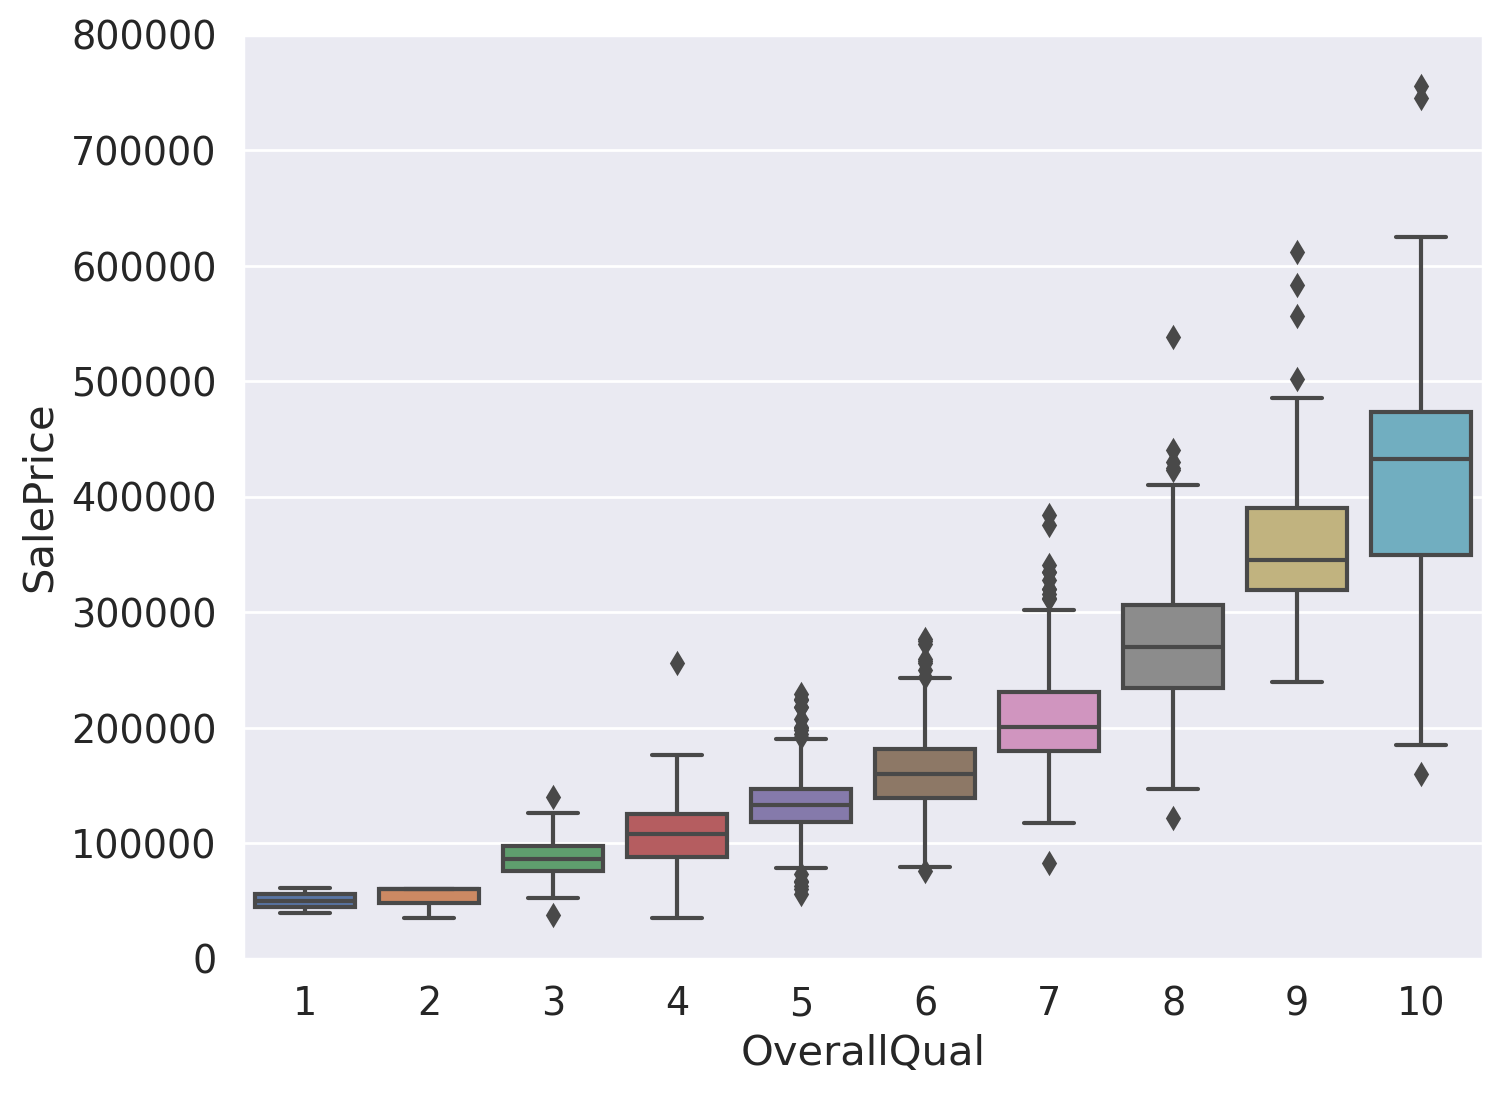

In [57]:
# Overall Quality vs Sale Price
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

# Conclusion -> for better quality people pay better price

# Living Area vs Sale Price

StatementMeta(, 2be89e7a-551b-43ea-b706-d967ed1ca14b, 60, Finished, Available)

r: 0.7086244776126522
p: 4.518033646776417e-223


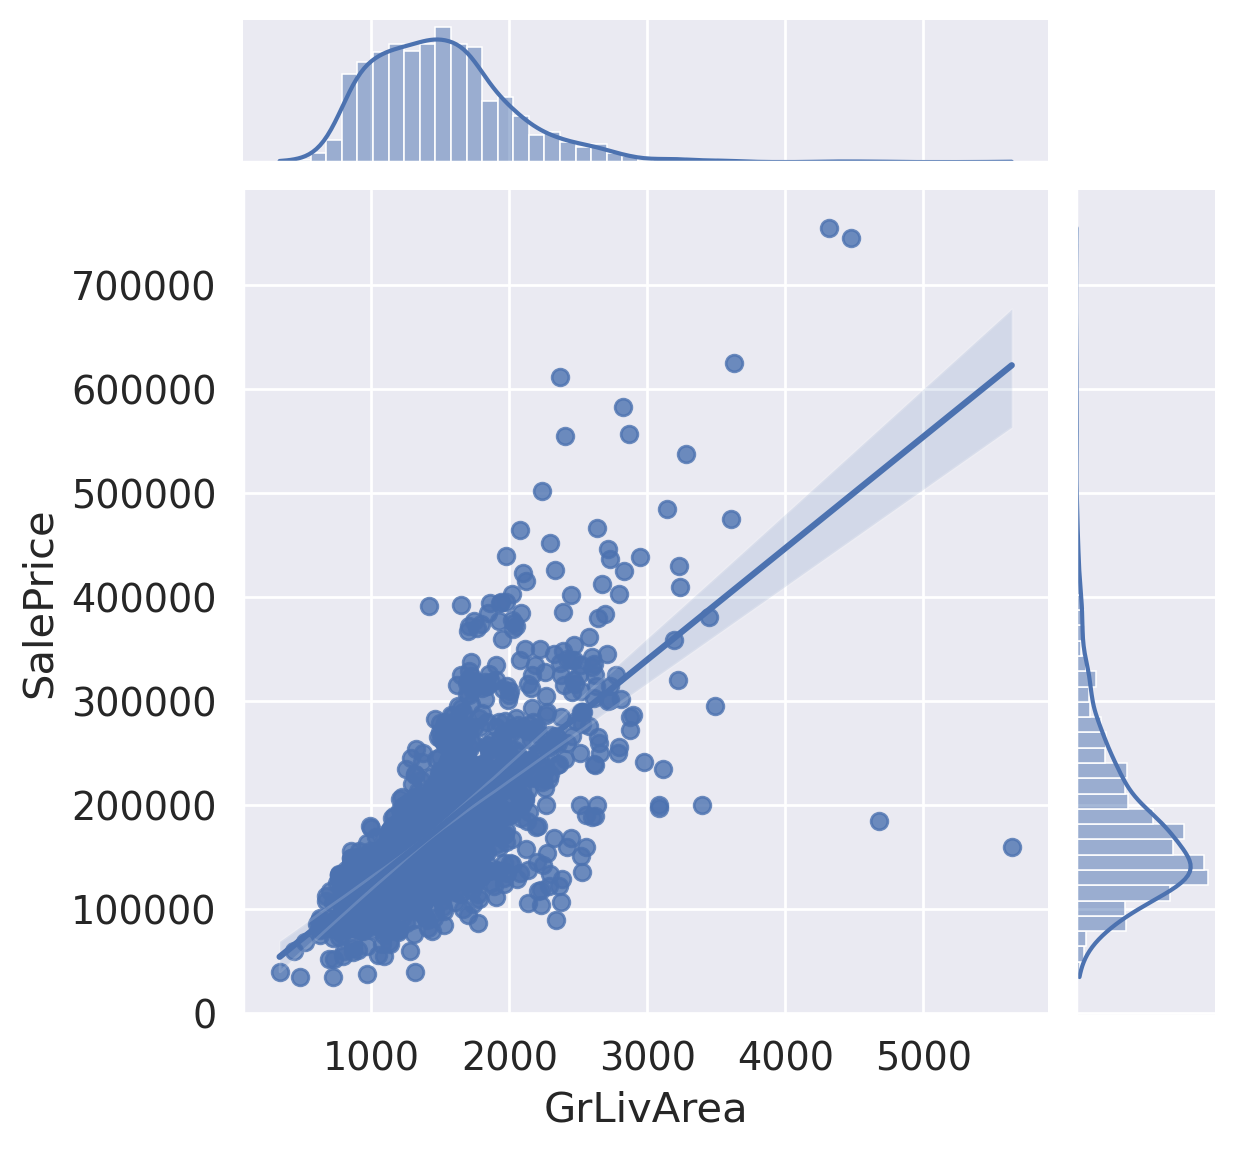

In [58]:
# Living Area vs Sale Price
sns.jointplot(x=train['GrLivArea'], y=train['SalePrice'], kind='reg')
(r, p) = pearsonr(x=train['GrLivArea'], y=train['SalePrice'])
print(f"r: {r}")
print(f"p: {p}")

In [59]:
# Removing outliers manually (Two points in the bottom right)
train = train.drop(train[(train['GrLivArea']>4000) 
                         & (train['SalePrice']<300000)].index).reset_index(drop=True)

StatementMeta(, 2be89e7a-551b-43ea-b706-d967ed1ca14b, 61, Finished, Available)

StatementMeta(, 2be89e7a-551b-43ea-b706-d967ed1ca14b, 62, Finished, Available)

r: 0.7349681645359327
p: 6.59111260363473e-248


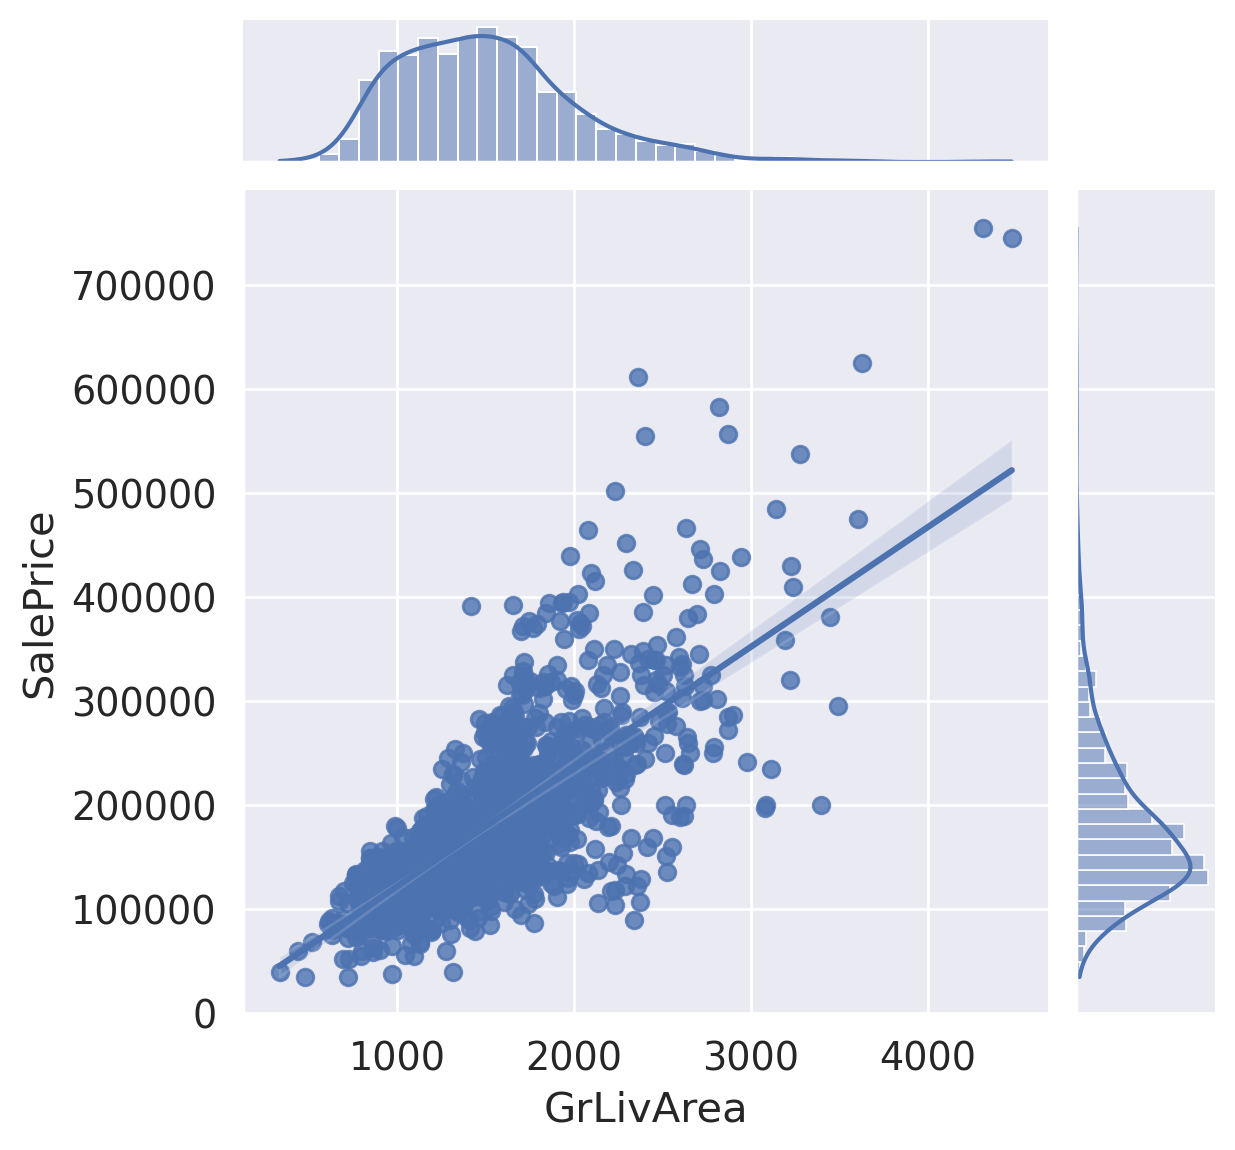

In [60]:
# Living Area vs Sale Price
sns.jointplot(x=train['GrLivArea'], y=train['SalePrice'], kind='reg')
(r, p) = pearsonr(x=train['GrLivArea'], y=train['SalePrice'])
print(f"r: {r}")
print(f"p: {p}")

## Garage area vs Sales price

StatementMeta(, 2be89e7a-551b-43ea-b706-d967ed1ca14b, 63, Finished, Available)

<AxesSubplot: xlabel='GarageCars', ylabel='SalePrice'>

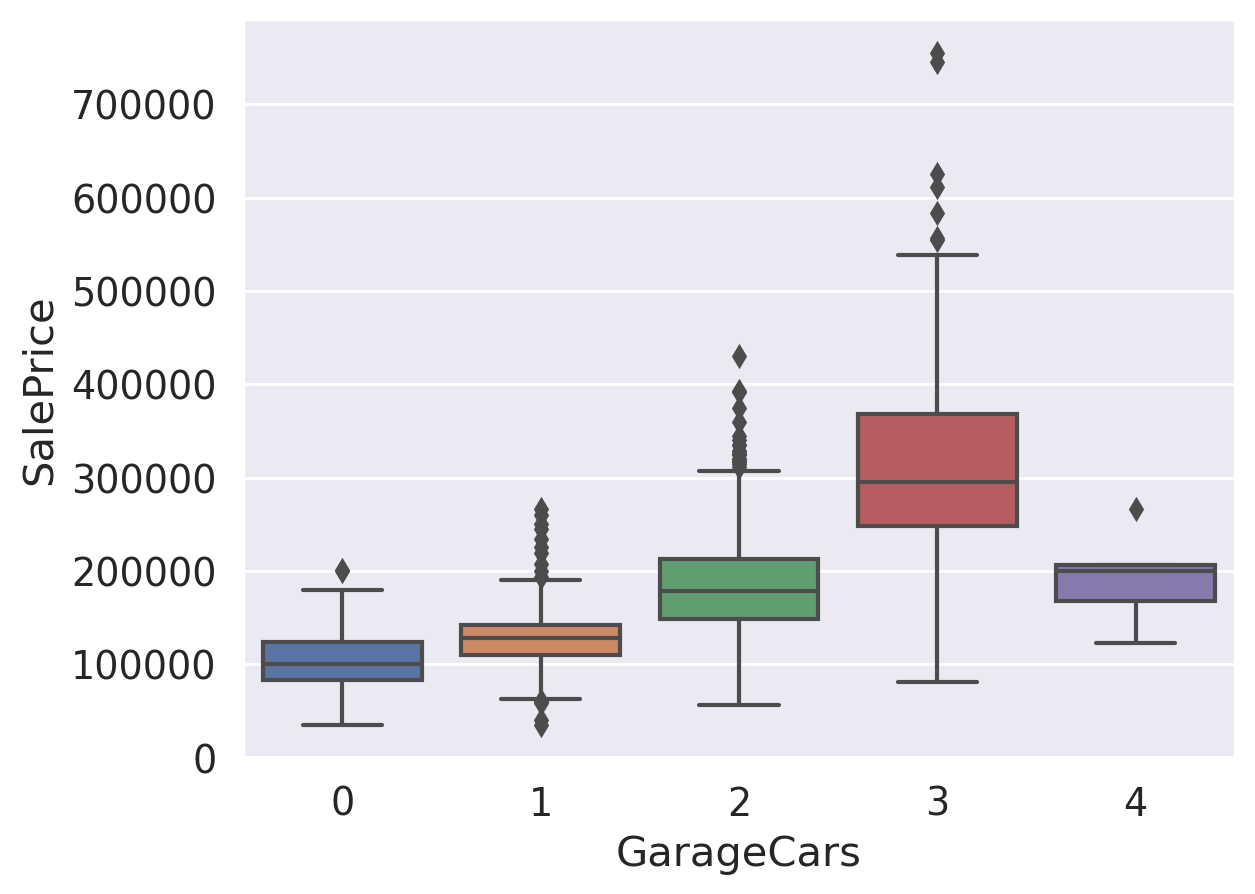

In [61]:
# Garage Area vs Sale Price
sns.boxplot(x=train['GarageCars'], y=train['SalePrice'])
# 4 Garage less price? Seems to be interesting

# First Floor Area vs Sale Price


StatementMeta(, 2be89e7a-551b-43ea-b706-d967ed1ca14b, 64, Finished, Available)

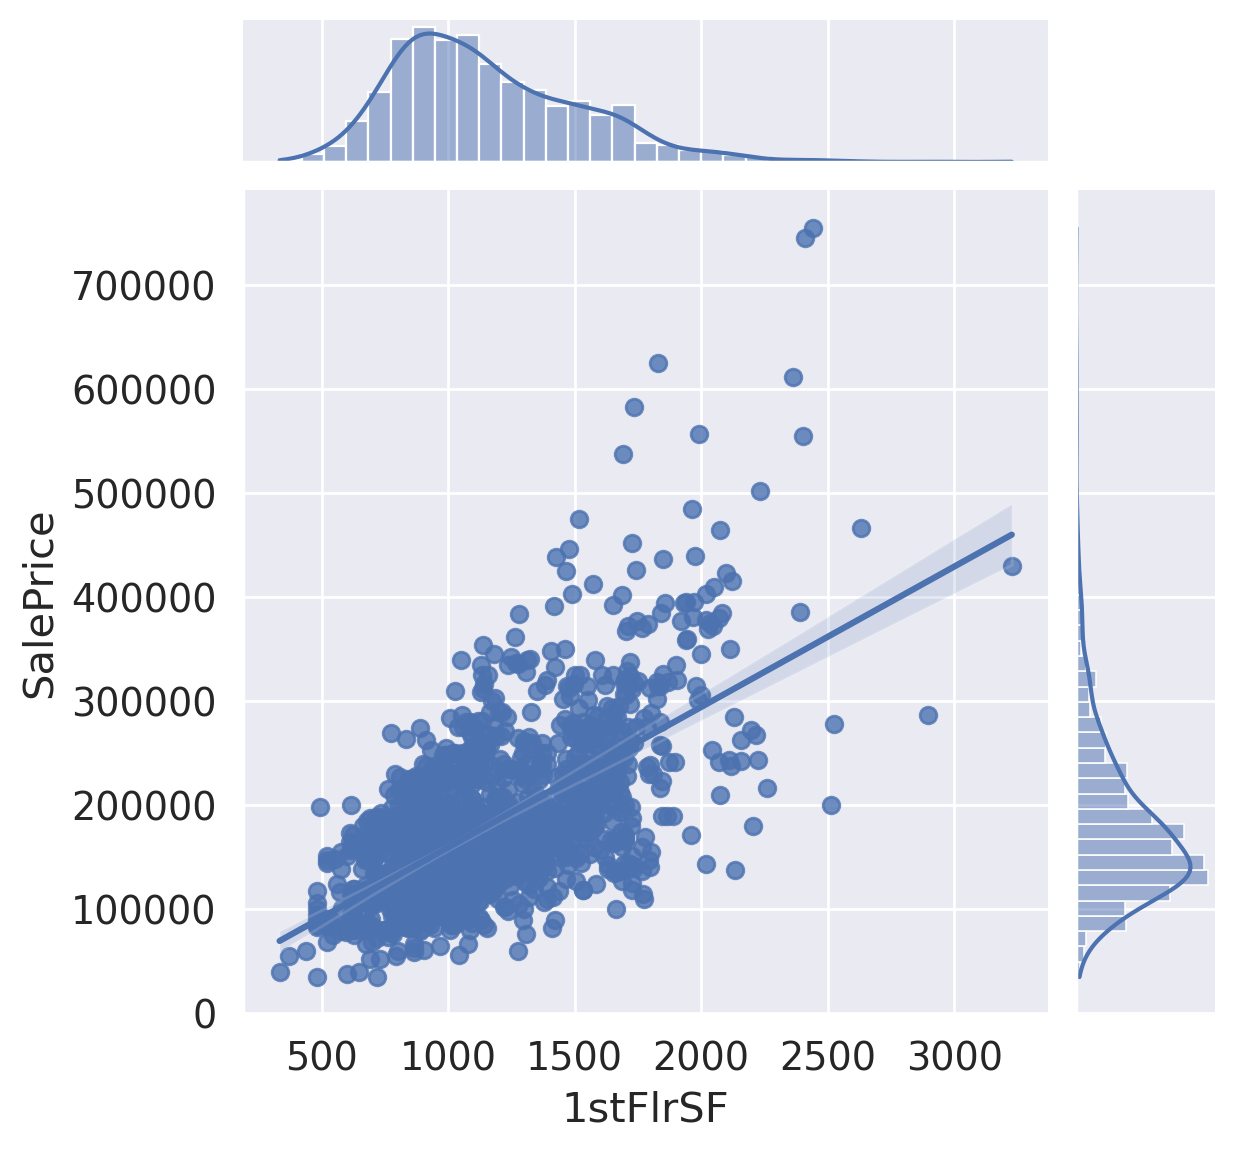

In [62]:
# First Floor Area vs Sale Price
sns.jointplot(x=train['1stFlrSF'], y=train['SalePrice'], kind='reg')

# Total Rooms vs Sale Price

StatementMeta(, 2be89e7a-551b-43ea-b706-d967ed1ca14b, 65, Finished, Available)

<AxesSubplot: xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

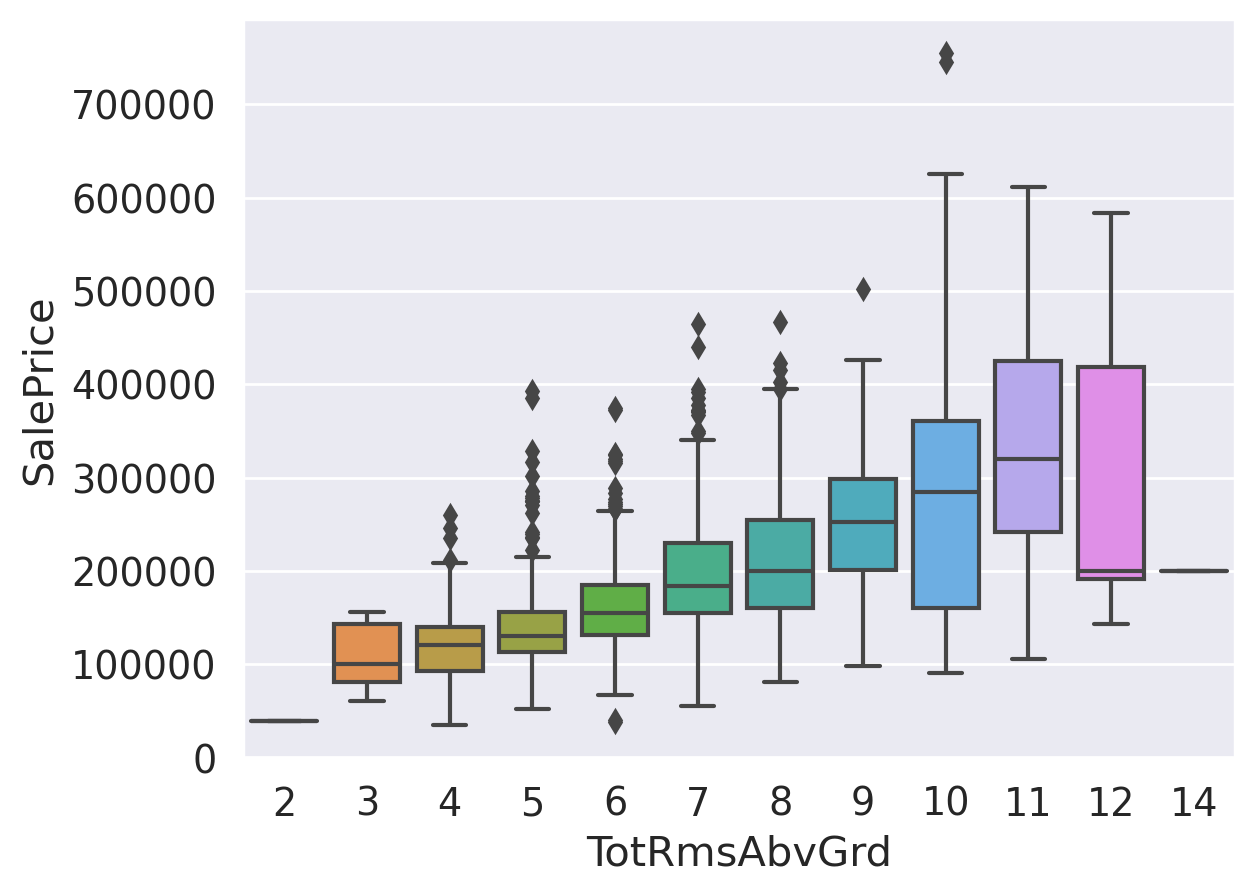

In [63]:
# Total Rooms vs Sale Price
sns.boxplot(x=train['TotRmsAbvGrd'], y=train['SalePrice'])

StatementMeta(, 2be89e7a-551b-43ea-b706-d967ed1ca14b, 66, Finished, Available)

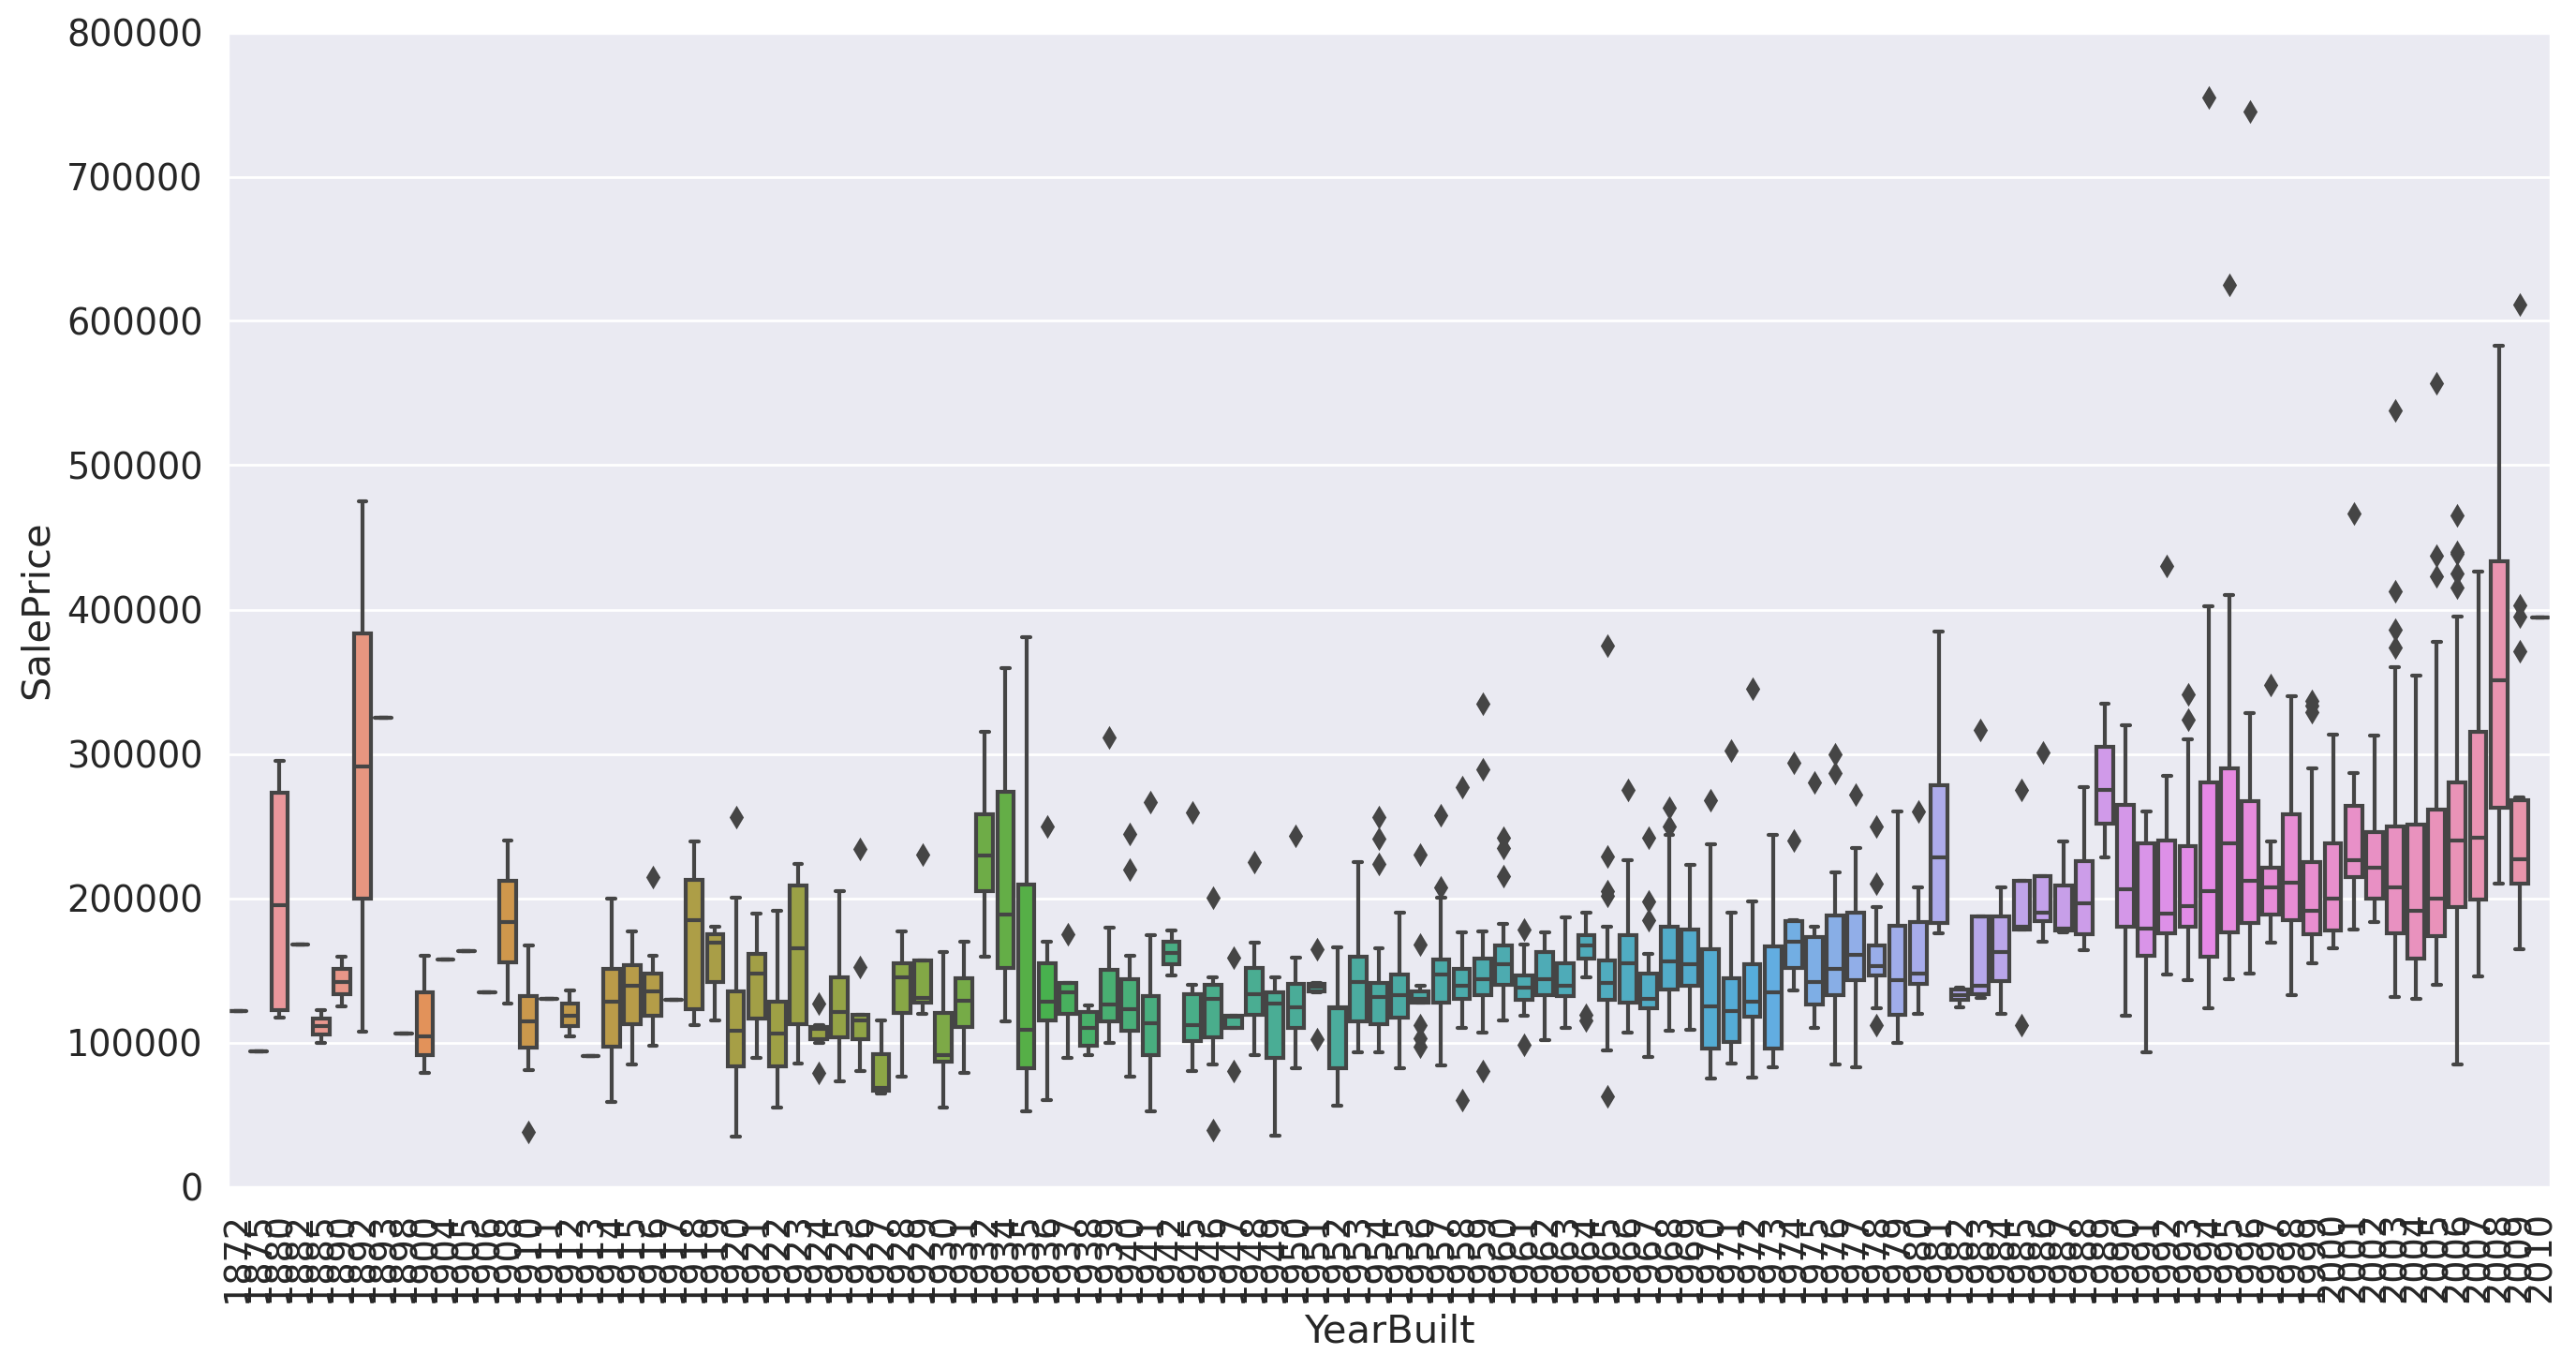

In [64]:
# Total Rooms vs Sale Price
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

Although it seems like house prices decrease with age, we can't be entirely sure. Is it because of inflation or stock market crashes? Let's leave the years alone.

# Cleaning data

In [65]:
most_corr_list = list(most_corr['Most Correlated Features'].unique())
most_corr_list_withoutsales = most_corr_list.copy()
most_corr_list_withoutsales.remove('SalePrice')
print(most_corr_list)
print(most_corr_list_withoutsales)

train = train[most_corr_list]
test = test[most_corr_list_withoutsales]
test


StatementMeta(, 2be89e7a-551b-43ea-b706-d967ed1ca14b, 67, Finished, Available)

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']


,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,5,896,1.0,730.0,882.0,896,1,5,1961
1,6,1329,1.0,312.0,1329.0,1329,1,6,1958
2,5,1629,2.0,482.0,928.0,928,2,6,1997
3,6,1604,2.0,470.0,926.0,926,2,7,1998
4,8,1280,2.0,506.0,1280.0,1280,2,5,1992
...,...,...,...,...,...,...,...,...,...
1454,4,1092,0.0,0.0,546.0,546,1,5,1970
1455,4,1092,1.0,286.0,546.0,546,1,6,1970
1456,5,1224,2.0,576.0,1224.0,1224,1,7,1960
1457,5,970,0.0,0.0,912.0,970,1,6,1992


In [66]:
# Find Missing Ratio of Dataset
train_data_na = (train.isnull().sum() / len(train)) * 100
train_data_na = train_data_na.drop(train_data_na[train_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :train_data_na})
missing_data

StatementMeta(, 2be89e7a-551b-43ea-b706-d967ed1ca14b, 68, Finished, Available)

,Missing Ratio


In [67]:
print(train.shape)
print(test.shape)

StatementMeta(, 2be89e7a-551b-43ea-b706-d967ed1ca14b, 69, Finished, Available)

(1458, 10)
(1459, 9)


In [68]:
train_table = spark.createDataFrame(train)
test_table = spark.createDataFrame(test)
train_table.write.format("delta").mode('overwrite').save("abfss://HousingPrices@onelake.dfs.fabric.microsoft.com/Silver.Lakehouse/Tables/train")
test_table.write.format("delta").mode('overwrite').save("abfss://HousingPrices@onelake.dfs.fabric.microsoft.com/Silver.Lakehouse/Tables/test")

StatementMeta(, 2be89e7a-551b-43ea-b706-d967ed1ca14b, 70, Finished, Available)

/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:604: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
